In [2]:
import importlib

from pygments.styles.dracula import yellow

import get_dataframes
importlib.reload(get_dataframes)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from get_dataframes import DataFrames

C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
flag_is_data_downloaded = True
DF = DataFrames(flag_is_data_downloaded)
df_flights = DF.get_df_flights()
df_with_tail_number = DF.get_df_with_tail_number()

In [4]:
jfk_flights_df = df_flights[df_flights['ORIGIN'] == 'JFK']

## Описание датасета

- FL_DATE : object - Дата рейса (yyyy-mm-dd).
- AIRLINE_CODE : object - Уникальный код авиакомпании.
- DOT_CODE : int64 - Идентификационный номер, назначенный US DOT для авиакомпании.
- FL_NUMBER : int64 - Номер рейса.
- ORIGIN : object - Аэропорт отправления.
- ORIGIN_CITY : object - Город отправления.
- DEST : object - Аэропорт прибытия.
- DEST_CITY : object - Город прибытия.
- CRS_DEP_TIME : int64 - Запланированное время отправления (локальное время: hhmm).
- DEP_TIME : float64 - Фактическое время отправления (локальное время: hhmm).
- DEP_DELAY : float64 - Разница между запланированным и фактическим временем отправления (в минутах).
- TAXI_OUT : float64 - Время руления на вылет (в минутах).
- WHEELS_OFF : float64 - Время отрыва от земли (локальное время: hhmm).
- WHEELS_ON : float64 - Время касания земли (локальное время: hhmm).
- TAXI_IN : float64 - Время руления после посадки (в минутах).
- CRS_ARR_TIME : int64 - Запланированное время прибытия (локальное время: hhmm).
- ARR_TIME : float64 - Фактическое время прибытия (локальное время: hhmm).
- ARR_DELAY : float64 - Разница между запланированным и фактическим временем прибытия (в минутах).
- CANCELLED : float64 - Индикация отмены рейса (1 = Да, 0 = Нет).
- CANCELLATION_CODE : object - Причина отмены рейса.
- DIVERTED : float64 - Индикация отклонения рейса (1 = Да, 0 = Нет).
- CRS_ELAPSED_TIME : float64 - Запланированное время полета (в минутах).
- ELAPSED_TIME : float64 - Фактическое время полета (в минутах).
- AIR_TIME : float64 - Время в воздухе (в минутах).
- DISTANCE : float64 - Расстояние между аэропортами (в милях).
- DELAY_DUE_CARRIER : float64 - Задержка по вине авиакомпании (в минутах).
- DELAY_DUE_WEATHER : float64 - Задержка из-за погодных условий (в минутах).
- DELAY_DUE_NAS : float64 - Задержка из-за системы NAS (в минутах).
- DELAY_DUE_SECURITY : float64 - Задержка из-за проблем безопасности (в минутах).
- DELAY_DUE_LATE_AIRCRAFT : float64 - Задержка из-за позднего прибытия самолёта (в минутах).

In [5]:
print('Пропущенных значений в jfk_flights_df:')
for col in jfk_flights_df.columns:
    print(f'{col}: {jfk_flights_df[col].isna().sum()}')

Пропущенных значений в jfk_flights_df:
FL_DATE: 0
AIRLINE: 0
AIRLINE_DOT: 0
AIRLINE_CODE: 0
DOT_CODE: 0
FL_NUMBER: 0
ORIGIN: 0
ORIGIN_CITY: 0
DEST: 0
DEST_CITY: 0
CRS_DEP_TIME: 0
DEP_TIME: 1359
DEP_DELAY: 1359
TAXI_OUT: 1411
WHEELS_OFF: 1411
WHEELS_ON: 1427
TAXI_IN: 1427
CRS_ARR_TIME: 0
ARR_TIME: 1427
ARR_DELAY: 1552
CANCELLED: 0
CANCELLATION_CODE: 49049
DIVERTED: 0
CRS_ELAPSED_TIME: 0
ELAPSED_TIME: 1552
AIR_TIME: 1552
DISTANCE: 0
DELAY_DUE_CARRIER: 40162
DELAY_DUE_WEATHER: 40162
DELAY_DUE_NAS: 40162
DELAY_DUE_SECURITY: 40162
DELAY_DUE_LATE_AIRCRAFT: 40162


In [6]:
print("Данные jfk_flights_df:")
jfk_flights_df

Данные jfk_flights_df:


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
20,2022-05-05,JetBlue Airways,JetBlue Airways: B6,B6,20409,1273,JFK,"New York, NY",CHS,"Charleston, SC",...,0.0,129.0,106.0,86.0,636.0,NaN,NaN,NaN,NaN,NaN
136,2021-11-23,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1406,JFK,"New York, NY",TPA,"Tampa, FL",...,0.0,166.0,141.0,128.0,1005.0,NaN,NaN,NaN,NaN,NaN
151,2023-07-02,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3950,JFK,"New York, NY",IAD,"Washington, DC",...,0.0,92.0,71.0,44.0,228.0,NaN,NaN,NaN,NaN,NaN
180,2023-03-13,JetBlue Airways,JetBlue Airways: B6,B6,20409,2539,JFK,"New York, NY",BQN,"Aguadilla, PR",...,0.0,237.0,229.0,192.0,1576.0,3.0,0.0,0.0,0.0,35.0
189,2019-11-26,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,347,JFK,"New York, NY",DFW,"Dallas/Fort Worth, TX",...,0.0,256.0,270.0,228.0,1391.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999760,2022-12-13,JetBlue Airways,JetBlue Airways: B6,B6,20409,403,JFK,"New York, NY",SJU,"San Juan, PR",...,0.0,224.0,212.0,178.0,1598.0,NaN,NaN,NaN,NaN,NaN
2999763,2022-07-02,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,863,JFK,"New York, NY",ATL,"Atlanta, GA",...,0.0,152.0,120.0,101.0,760.0,NaN,NaN,NaN,NaN,NaN
2999838,2022-11-08,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,639,JFK,"New York, NY",SJU,"San Juan, PR",...,0.0,231.0,233.0,196.0,1598.0,NaN,NaN,NaN,NaN,NaN
2999884,2019-10-26,JetBlue Airways,JetBlue Airways: B6,B6,20409,65,JFK,"New York, NY",ABQ,"Albuquerque, NM",...,0.0,300.0,275.0,250.0,1826.0,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Описательная статистика jfk_flights_df:")
jfk_flights_df.describe()

Описательная статистика jfk_flights_df:


,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,50466.000000,50466.000000,50466.000000,49107.000000,49107.000000,49055.000000,49055.000000,49039.000000,49039.000000,50466.000000,...,50466.000000,50466.000000,48914.000000,48914.000000,50466.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000
mean,20172.700174,2134.540958,1365.045635,1362.905533,13.315637,24.513036,1394.416838,1481.002345,8.105304,1526.282051,...,0.002675,213.855249,204.694423,172.092612,1211.991717,32.663626,3.084142,18.062209,0.112675,19.695070
std,291.770413,1867.294068,487.216955,506.586858,52.716449,13.320619,515.508834,564.872536,6.589064,548.935817,...,0.051652,112.705715,112.119703,110.202667,861.667982,72.335037,27.313740,40.226894,2.513792,44.668872
min,19690.000000,1.000000,500.000000,1.000000,-62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,54.000000,39.000000,24.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19805.000000,523.000000,906.250000,908.000000,-6.000000,16.000000,928.000000,1052.000000,5.000000,1115.000000,...,0.000000,120.000000,112.000000,79.000000,427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20363.000000,1497.000000,1400.000000,1401.000000,-2.000000,21.000000,1419.000000,1503.000000,6.000000,1531.000000,...,0.000000,184.000000,172.000000,142.000000,1028.000000,11.000000,0.000000,5.000000,0.000000,0.000000
75%,20409.000000,3579.000000,1800.000000,1810.000000,9.000000,28.000000,1832.000000,1948.000000,9.000000,2010.000000,...,0.000000,334.750000,319.000000,288.000000,2153.000000,35.000000,0.000000,23.000000,0.000000,19.000000
max,20452.000000,8819.000000,2359.000000,2400.000000,1339.000000,182.000000,2400.000000,2400.000000,125.000000,2359.000000,...,1.000000,697.000000,722.000000,689.000000,4983.000000,1334.000000,1101.000000,1003.000000,139.000000,697.000000



Распределение задержек отправления:


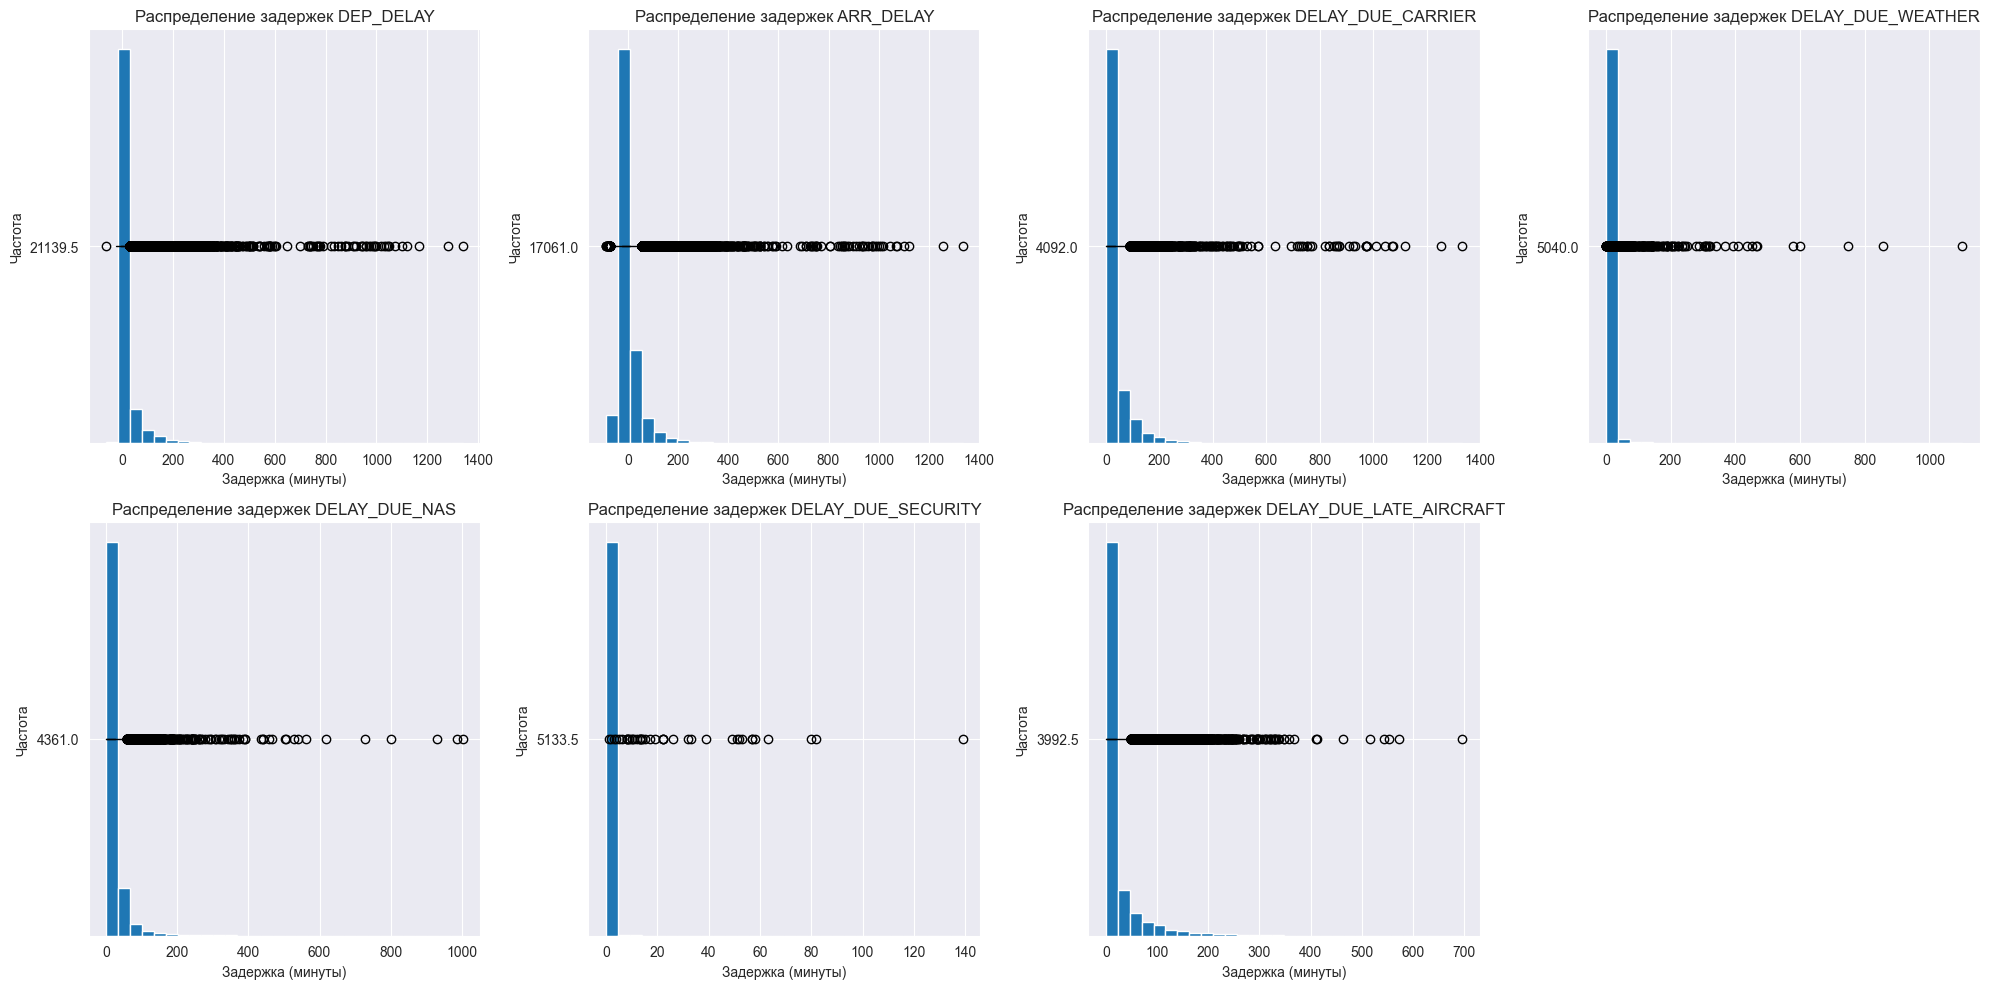

In [8]:
print("\nРаспределение задержек отправления:")
fig, ax = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
deley_cols = [col for col in jfk_flights_df.columns if 'DELAY' in col]
for i, col in enumerate(deley_cols):
    if 'DELAY' in col:
        x, y =  i // 4, i % 4
        count, bins, _ = ax[x, y].hist(jfk_flights_df[col], bins=30)
        pos = max(count) / 2
        ax[x, y].boxplot(jfk_flights_df[col].dropna(), vert=False, positions=[pos])
        ax[x, y].set_title(f"Распределение задержек {col}")
        ax[x, y].set_xlabel("Задержка (минуты)")
        ax[x, y].set_ylabel("Частота")
fig.delaxes(ax[1, 3])
plt.tight_layout()


Распределение задержек отправления:


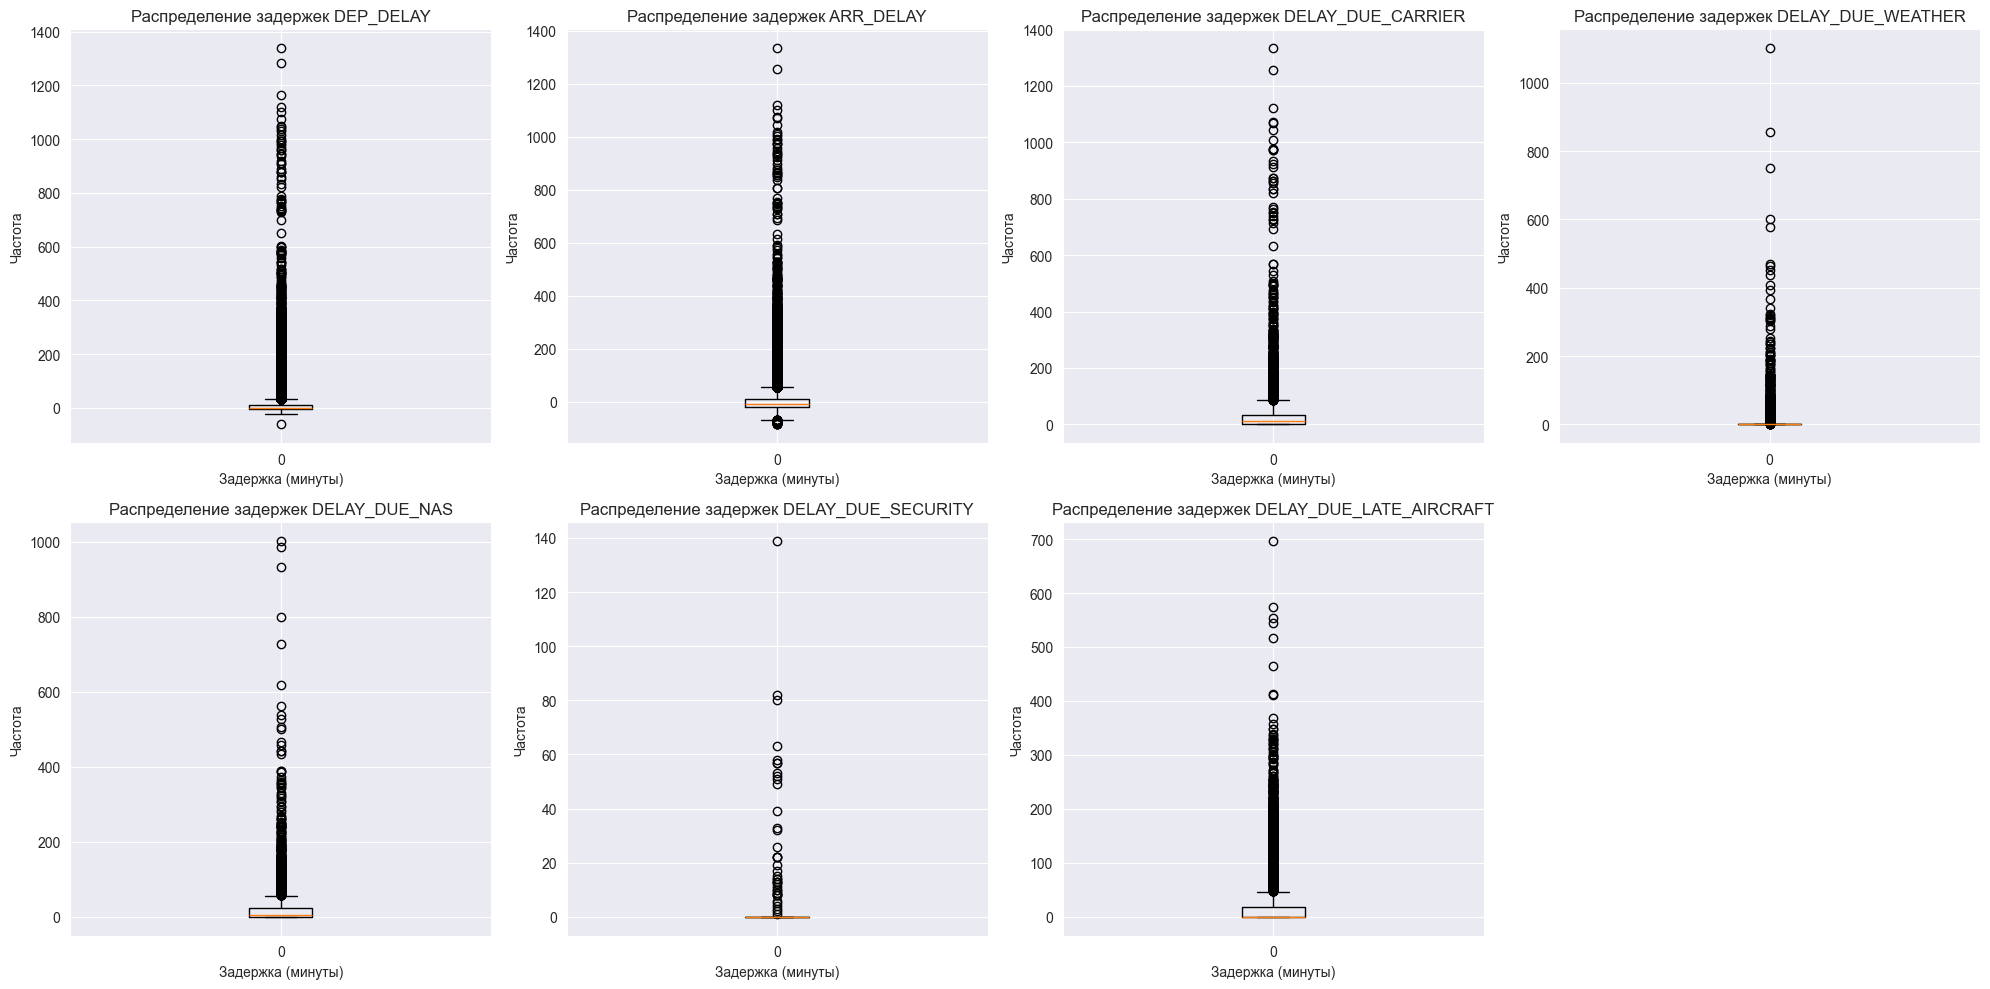

In [9]:
print("\nРаспределение задержек отправления:")
fig, ax = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
deley_cols = [col for col in jfk_flights_df.columns if 'DELAY' in col]
for i, col in enumerate(deley_cols):
    if 'DELAY' in col:
        x, y =  i // 4, i % 4
        ax[x, y].boxplot(jfk_flights_df[col].dropna(), positions=[0])
        ax[x, y].set_title(f"Распределение задержек {col}")
        ax[x, y].set_xlabel("Задержка (минуты)")
        ax[x, y].set_ylabel("Частота")
fig.delaxes(ax[1, 3])
plt.tight_layout()

In [10]:
jfk_flights_df.isnull()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
136,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
151,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
180,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2999763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2999838,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2999884,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True


Text(0.5, 1.0, 'Тепловая карта пропусков в данных')

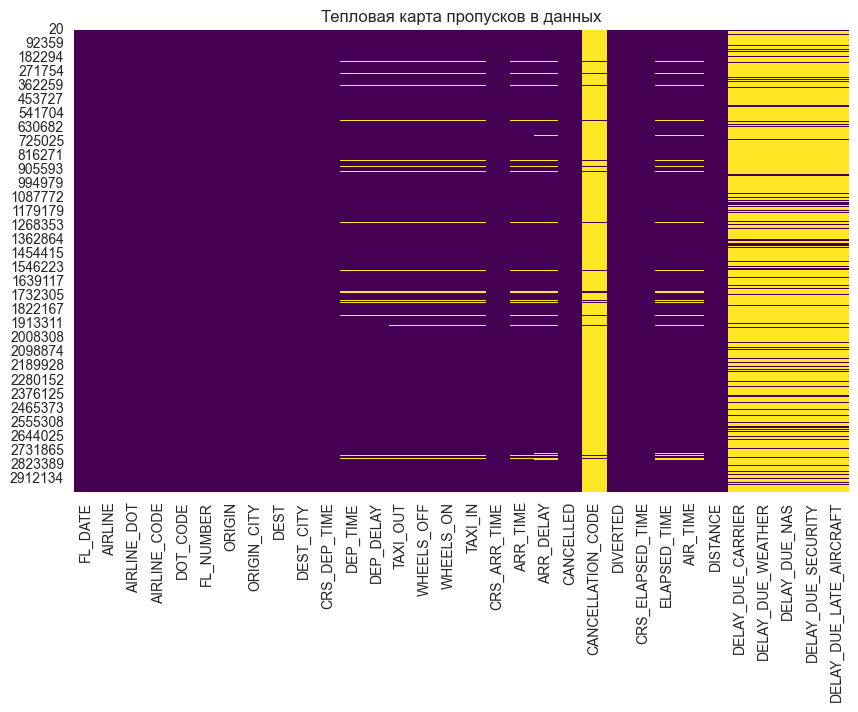

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(jfk_flights_df.isnull(), cbar=False, cmap='viridis')
plt.title("Тепловая карта пропусков в данных")

C:\Users\Mi\AppData\Local\Temp\ipykernel_37024\3485469925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_flights_df['FL_DATE'] = pd.to_datetime(jfk_flights_df['FL_DATE'])
C:\Users\Mi\AppData\Local\Temp\ipykernel_37024\3485469925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_flights_df['Month'] = jfk_flights_df['FL_DATE'].dt.month
C:\Users\Mi\AppData\Local\Temp\ipykernel_37024\3485469925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

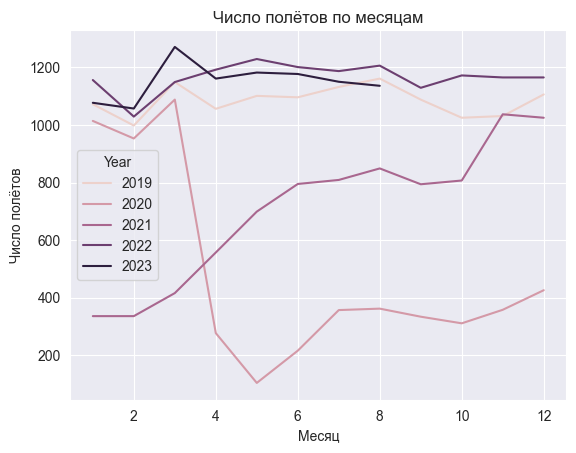

In [11]:
if 'FL_DATE' in jfk_flights_df.columns:
    jfk_flights_df['FL_DATE'] = pd.to_datetime(jfk_flights_df['FL_DATE'])
    jfk_flights_df['Month'] = jfk_flights_df['FL_DATE'].dt.month
    jfk_flights_df['Year'] = jfk_flights_df['FL_DATE'].dt.year

    monthly_flights = jfk_flights_df.groupby(['Year', 'Month']).size().reset_index(name='Flights')
    sns.lineplot(data=monthly_flights, x='Month', y='Flights', hue='Year')
    plt.title("Число полётов по месяцам")
    plt.xlabel("Месяц")
    plt.ylabel("Число полётов")
    plt.show()

C:\Users\Mi\AppData\Local\Temp\ipykernel_37024\1714454432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_flights_df['Cancelled'] = jfk_flights_df['CANCELLATION_CODE'].notnull()


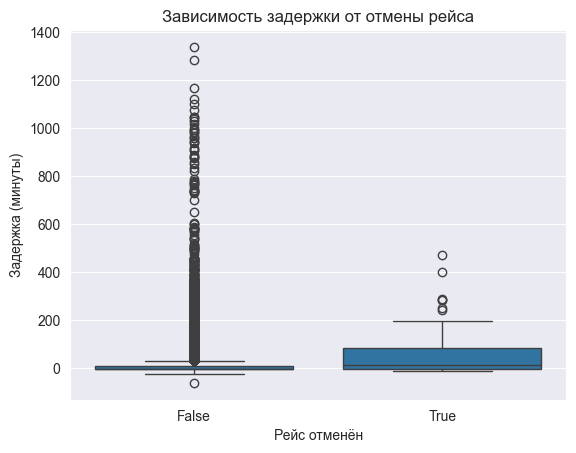

In [12]:
if 'DEP_DELAY' in jfk_flights_df.columns and 'CANCELLATION_CODE' in jfk_flights_df.columns:
    jfk_flights_df['Cancelled'] = jfk_flights_df['CANCELLATION_CODE'].notnull()
    sns.boxplot(data=jfk_flights_df, x='Cancelled', y='DEP_DELAY')
    plt.title("Зависимость задержки от отмены рейса")
    plt.xlabel("Рейс отменён")
    plt.ylabel("Задержка (минуты)")
    plt.show()

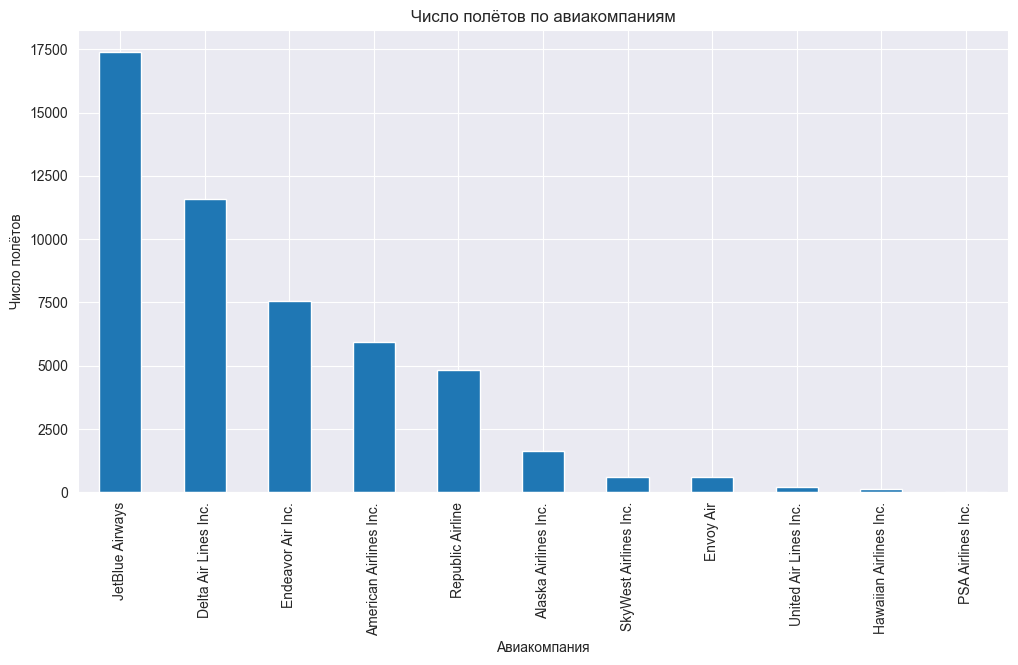

In [13]:
if 'AIRLINE' in jfk_flights_df.columns:
    airline_counts = jfk_flights_df['AIRLINE'].value_counts()
    airline_counts.plot(kind='bar', figsize=(12, 6))
    plt.title("Число полётов по авиакомпаниям")
    plt.xlabel("Авиакомпания")
    plt.ylabel("Число полётов")
    plt.show()

# Сохранение результата в файл (если потребуется)
# summary_path = "flights_data_summary.csv"
# flights_data.describe().to_csv(summary_path)
# print(f"Описательная статистика сохранена в {summary_path}")

In [14]:
jfk_flights_df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Month,Year,Cancelled
20,2022-05-05,JetBlue Airways,JetBlue Airways: B6,B6,20409,1273,JFK,"New York, NY",CHS,"Charleston, SC",...,86.0,636.0,NaN,NaN,NaN,NaN,NaN,5,2022,False
136,2021-11-23,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1406,JFK,"New York, NY",TPA,"Tampa, FL",...,128.0,1005.0,NaN,NaN,NaN,NaN,NaN,11,2021,False
151,2023-07-02,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3950,JFK,"New York, NY",IAD,"Washington, DC",...,44.0,228.0,NaN,NaN,NaN,NaN,NaN,7,2023,False
180,2023-03-13,JetBlue Airways,JetBlue Airways: B6,B6,20409,2539,JFK,"New York, NY",BQN,"Aguadilla, PR",...,192.0,1576.0,3.0,0.0,0.0,0.0,35.0,3,2023,False
189,2019-11-26,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,347,JFK,"New York, NY",DFW,"Dallas/Fort Worth, TX",...,228.0,1391.0,NaN,NaN,NaN,NaN,NaN,11,2019,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999760,2022-12-13,JetBlue Airways,JetBlue Airways: B6,B6,20409,403,JFK,"New York, NY",SJU,"San Juan, PR",...,178.0,1598.0,NaN,NaN,NaN,NaN,NaN,12,2022,False
2999763,2022-07-02,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,863,JFK,"New York, NY",ATL,"Atlanta, GA",...,101.0,760.0,NaN,NaN,NaN,NaN,NaN,7,2022,False
2999838,2022-11-08,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,639,JFK,"New York, NY",SJU,"San Juan, PR",...,196.0,1598.0,NaN,NaN,NaN,NaN,NaN,11,2022,False
2999884,2019-10-26,JetBlue Airways,JetBlue Airways: B6,B6,20409,65,JFK,"New York, NY",ABQ,"Albuquerque, NM",...,250.0,1826.0,NaN,NaN,NaN,NaN,NaN,10,2019,False


In [20]:
# type(jfk_flights_df.info())
jfk_flights_df.select_dtypes(include=['number']).columns

Index(['DOT_CODE', 'FL_NUMBER', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'Year'],
      dtype='object')

In [21]:
numeric_feathures = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
                    'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
                     'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
                     'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
                     'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
                     'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'Year']

Text(0.5, 1.0, 'Матрица корреляции')

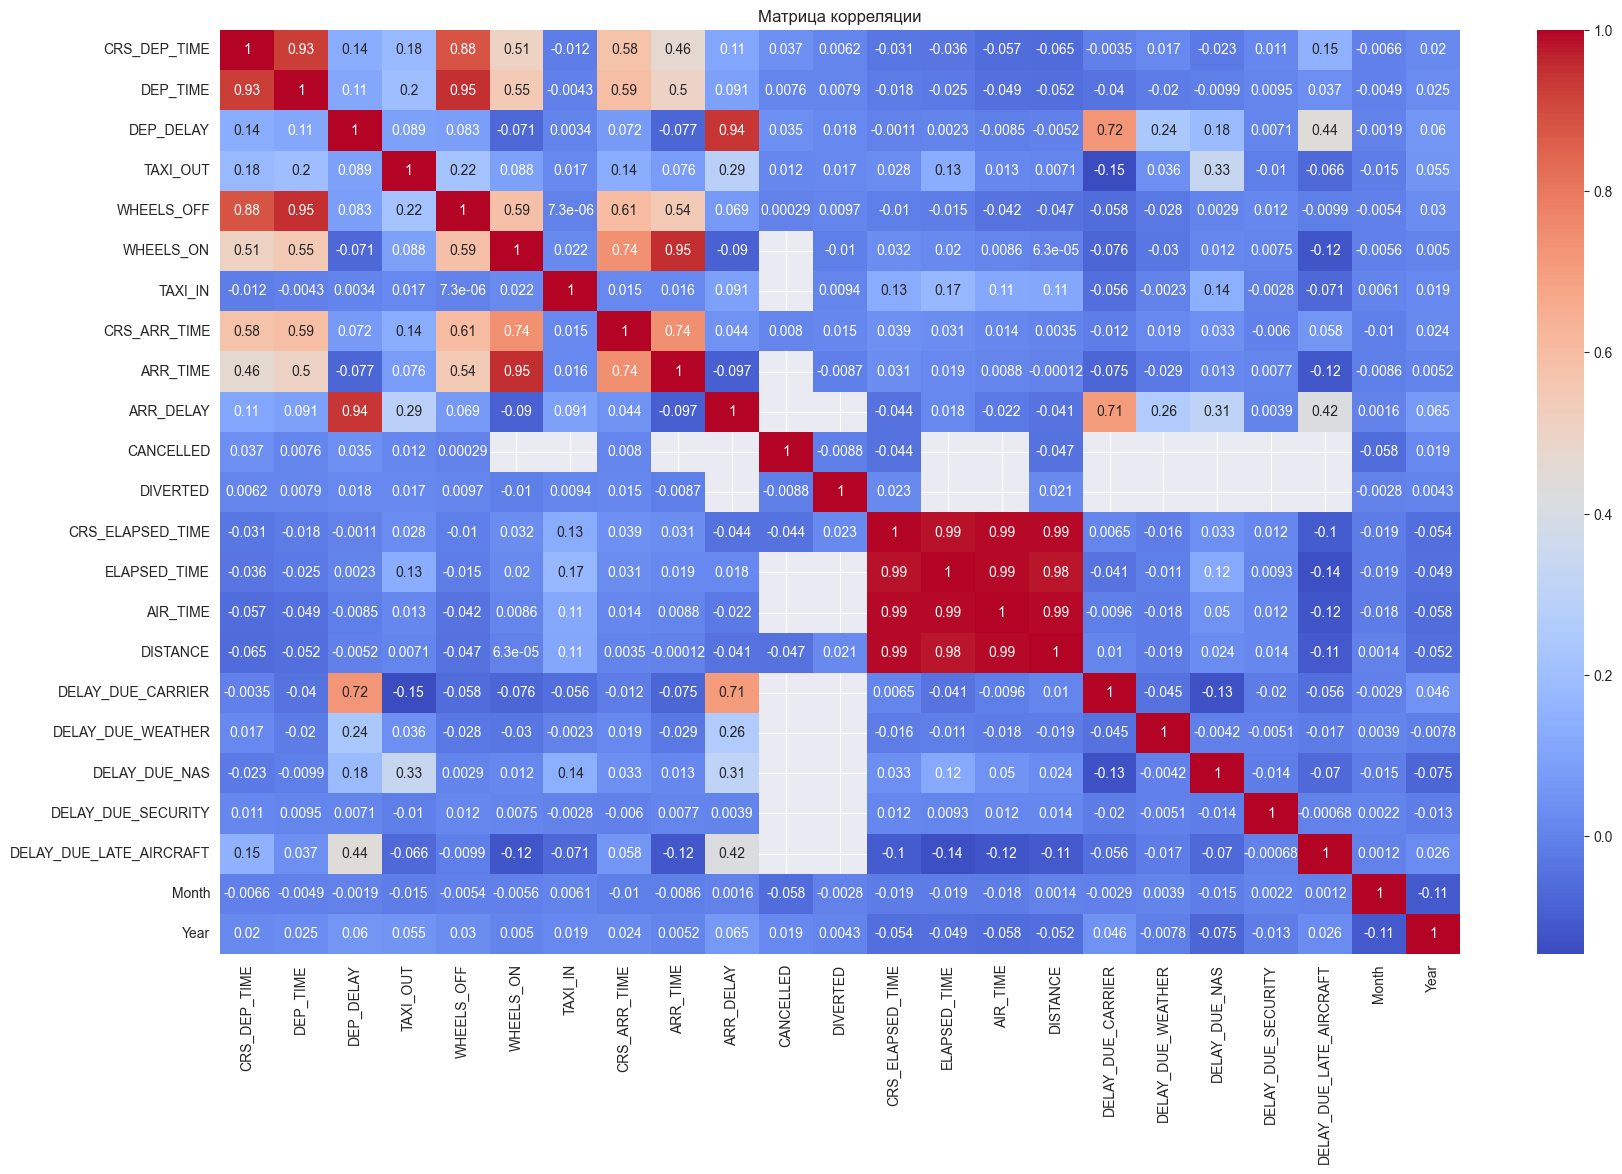

In [23]:
jfk_flights_df_numeric = jfk_flights_df[numeric_feathures].copy()
corr_df = jfk_flights_df_numeric.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(jfk_flights_df.isnull(), cbar=False, cmap='viridis')
plt.title("Тепловая карта пропусков в данных")